# <font color='#33C471'>Correlation Analysis</font>
### <font color='#655196'>FinTech Sandbox</font>

Contributor: [SpringTech Capital](http://www.springtechcapital.com/)

In [19]:
%load_ext autoreload
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <font color='#4E94DA'>1. Load data and preview it.</font>
This is just sample data (fundamental data). Feel free to read in any data set you wish to analyze. 

Consider these built-in pandas functions when loading data:
- [read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [read_pickle()](https://www.google.com/search?q=pandas+read_pickle&oq=pandas+read_pickle&aqs=chrome..69i57j0l5.3966j0j4&sourceid=chrome&ie=UTF-8)
- [read_sql()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html)
- [read_table()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)
<br><br>

<font color='#33C471'>__Load data.__</font>

In [21]:
df = pd.read_csv('../data/fundamentals.csv')
df = df[[col for col in df.columns.values if col != 'Unnamed: 0']] # Eliminate any unneeded columns

If necessary suppress scientific notation:

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<font color='#33C471'>__Preview the data__.</font><br><br>
_TIP: Adjust the value of `head()` (e.g., `head(3)`) to increase or decrease the number of rows displayed (default is five)_.

In [23]:
df.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3068000000.000,-222000000.000,-1961000000.000,23.000,-1888000000.000,4695000000.000,53.000,1330000000.000,...,7072000000.000,9011000000.000,-7987000000.000,24891000000.000,16904000000.000,24855000000.000,-367000000.000,2012.000,-5.600,335000000.000
1,AAL,2013-12-31,4975000000.000,-93000000.000,-2723000000.000,67.000,-3114000000.000,10592000000.000,75.000,2175000000.000,...,14323000000.000,13806000000.000,-2731000000.000,45009000000.000,42278000000.000,26743000000.000,0.000,2013.000,-11.250,163022222.222
2,AAL,2014-12-31,4668000000.000,-160000000.000,-150000000.000,143.000,-5311000000.000,15135000000.000,60.000,1768000000.000,...,11750000000.000,13404000000.000,2021000000.000,41204000000.000,43225000000.000,42650000000.000,0.000,2014.000,4.020,716915422.886
3,AAL,2015-12-31,5102000000.000,352000000.000,-708000000.000,135.000,-6151000000.000,11591000000.000,51.000,1085000000.000,...,9985000000.000,13605000000.000,5635000000.000,42780000000.000,48415000000.000,40990000000.000,0.000,2015.000,11.390,668129938.543
4,AAP,2012-12-29,2409453000.000,-89482000.000,600000.000,32.000,-271182000.000,520215000.000,23.000,598111000.000,...,3184200000.000,2559638000.000,1210694000.000,3403120000.000,4613814000.000,6205003000.000,-27095000.000,2012.000,5.290,73283553.875


<font color='#33C471'>__See all column names__.</font><br><br>

In [24]:
df.columns

Index([u'Ticker Symbol', u'Period Ending', u'Accounts Payable',
       u'Accounts Receivable', u'Add'l income/expense items', u'After Tax ROE',
       u'Capital Expenditures', u'Capital Surplus', u'Cash Ratio',
       u'Cash and Cash Equivalents', u'Changes in Inventories',
       u'Common Stocks', u'Cost of Revenue', u'Current Ratio',
       u'Deferred Asset Charges', u'Deferred Liability Charges',
       u'Depreciation', u'Earnings Before Interest and Tax',
       u'Earnings Before Tax', u'Effect of Exchange Rate',
       u'Equity Earnings/Loss Unconsolidated Subsidiary', u'Fixed Assets',
       u'Goodwill', u'Gross Margin', u'Gross Profit', u'Income Tax',
       u'Intangible Assets', u'Interest Expense', u'Inventory', u'Investments',
       u'Liabilities', u'Long-Term Debt', u'Long-Term Investments',
       u'Minority Interest', u'Misc. Stocks', u'Net Borrowings',
       u'Net Cash Flow', u'Net Cash Flow-Operating',
       u'Net Cash Flows-Financing', u'Net Cash Flows-Investing', u'

<font color='#33C471'>__Check column data types__.</font><br><br>

In [25]:
df.dtypes

Ticker Symbol                                           object
Period Ending                                           object
Accounts Payable                                       float64
Accounts Receivable                                    float64
Add'l income/expense items                             float64
After Tax ROE                                          float64
Capital Expenditures                                   float64
Capital Surplus                                        float64
Cash Ratio                                             float64
Cash and Cash Equivalents                              float64
Changes in Inventories                                 float64
Common Stocks                                          float64
Cost of Revenue                                        float64
Current Ratio                                          float64
Deferred Asset Charges                                 float64
Deferred Liability Charges                             

<font color='#33C471'>__Check for null values__.</font><br><br>

Resources: [isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)

In [26]:
df.isnull().sum()

Ticker Symbol                                            0
Period Ending                                            0
Accounts Payable                                         0
Accounts Receivable                                      0
Add'l income/expense items                               0
After Tax ROE                                            0
Capital Expenditures                                     0
Capital Surplus                                          0
Cash Ratio                                             299
Cash and Cash Equivalents                                0
Changes in Inventories                                   0
Common Stocks                                            0
Cost of Revenue                                          0
Current Ratio                                          299
Deferred Asset Charges                                   0
Deferred Liability Charges                               0
Depreciation                                            

<font color='#33C471'>__Impute missing values__</font>

Resources: [fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [27]:
df.fillna(0, inplace=True)

<font color='#33C471'>__View basic descriptive statistics__</font>

Descriptive statistics differs from inferential statistics (or inductive statistics), in that descriptive statistics _aims to summarize a sample, rather than use the data to learn about the population_ that the sample of data is thought to represent. (See, e.g., [Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics))

Resources: [describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [28]:
df.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,...,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000
mean,4673417755.755,-63534842.223,69089399.214,43.601,-1251924663.111,5351783833.240,61.957,8521399416.058,-67877487.367,1608543028.636,...,6726348593.487,4699918938.798,11888455635.598,43804202904.548,55692658540.146,20291543427.850,-3951522290.286,1817.740,2.941,528347480.222
std,14060472820.102,756279433.677,684814332.322,233.924,2979962962.668,11339771504.631,97.376,54321046048.252,390336885.933,9177635746.112,...,13448000447.721,9538832077.252,25844289612.865,181703864897.771,203361247941.493,40953552282.357,14070468017.889,596.696,4.533,1088135817.718
min,0.000,-6452000000.000,-6768000000.000,0.000,-37985000000.000,-721500000.000,0.000,21000.000,-5562000000.000,0.000,...,0.000,0.000,-13244000000.000,2577000.000,2705000.000,1514000.000,-229734000000.000,0.000,-61.200,-1513945000.000
25%,516000000.000,-104000000.000,-2638000.000,10.000,-1151200000.000,479100000.000,6.000,308800000.000,-54000000.000,1628000.000,...,1044178000.000,564076000.000,2201492000.000,3843300000.000,6552689000.000,3714000000.000,-3040895000.000,2013.000,1.000,115595238.095
50%,1334000000.000,-18300000.000,2000000.000,16.000,-358000000.000,1997080000.000,30.000,862590000.000,0.000,7725000.000,...,2747200000.000,1701500000.000,4983000000.000,9141000000.000,15170000000.000,8023200000.000,-306835000.000,2014.000,2.470,240817277.487
75%,3246000000.000,7816000.000,33592000.000,26.000,-129100000.000,5735000000.000,76.000,2310000000.000,0.000,297000000.000,...,6162000000.000,4381000000.000,10809000000.000,23897000000.000,35997100000.000,17486000000.000,0.000,2015.000,4.280,493698630.137
max,206939000000.000,22664000000.000,14162000000.000,5789.000,5000000.000,108288000000.000,1041.000,728111000000.000,3755000000.000,158142000000.000,...,139660000000.000,90281000000.000,256205000000.000,2340547000000.000,2572274000000.000,485651000000.000,0.000,2016.000,50.090,16107692307.700


<font color='#33C471'>__Preview data distributions__.</font>

Resources: [Seaborn, statistical data visualization](https://seaborn.pydata.org/)

<font color='#CD494D'>__Box Plot__</font>
 - the __box__ presents the __[interquartile range](https://en.wikipedia.org/wiki/Interquartile_range)__ (25th - 75th percentile)
 - the __line in the center__ of the box represents the __median__ (50th percentile)
 - the __lines extending from the box__ represet the __range__ (the minimum and maximum values)

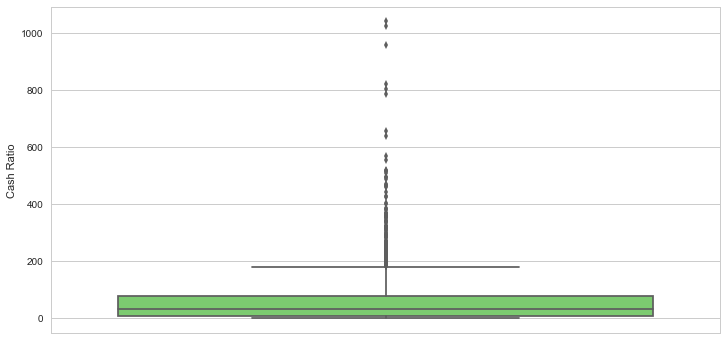

In [29]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))

sns.boxplot(df['Cash Ratio'], color='#71DA61', orient='v');

<font color='#CD494D'>__Violin Plot__</font>
<br>
<br>
Because the violin plot provides a probability density estimate, it has the advantage of displaying nuances in the distribtion not perceptible in the boxplot.

 - the __white dot__ represents the __median__
 - the __thick gray bar__ in the center represents the __interquartile range (IQR)__
 - the __thin gray line__ represents the __95% [confidence interval](https://www.mathbootcamps.com/interpreting-confidence-intervals/)__

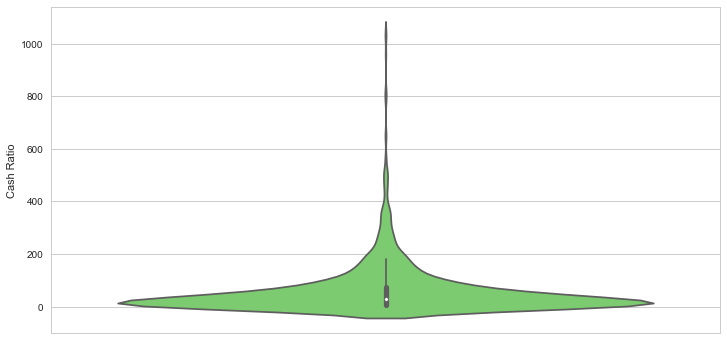

In [30]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))

sns.violinplot(df['Cash Ratio'], color='#71DA61', orient='v'); # Seaborn

<font color='#CD494D'>__Histogram - KDE__</font>
<br>
<br>
A __frequency table__ is a tally of the count of numeric data that fall into a set of intervals or "bins" (e.g., the number of times the price of a security falls in the \$101-\$110 bin as opposed to the \$111-\$119 and \$120-\$129 bins). 

A __histogram__ is a plot of the frequency table with the bins on the x-axis and the count on the y-axis. 

A __density plot__ is a smoothed version of a histogram, often based on a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation). ("In statistics, __kernel density estimation (KDE)__ is a non-parametric way to estimate the probability density function of a random variable.")

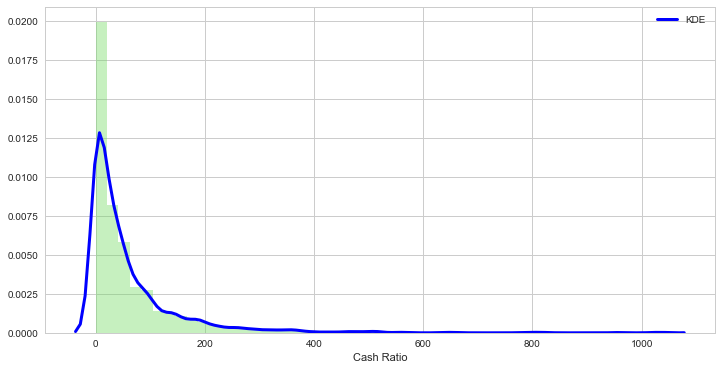

In [31]:
plt.figure(figsize=(12,6))
sns.distplot(df['Cash Ratio'], kde=True, color='#71DA61', 
             kde_kws={"color": "blue", "lw": 3, "label": "KDE"});

### <font color='#4E94DA'>2. Review Correlations.</font>

__Correlation analysis__ measures the extent to which two variable vary together, including the _strength_ and _direction_ of the relationship.

A __correlation coefficient__ (often denoted $\rho$) measures the strength and direction of a _linear_ relationship between two [random variables](https://en.wikipedia.org/wiki/Random_variable).
- 1 = Perfect positive (linear) correlation 
- -1 = Perfect negative (linear) correlation
- 0 = No (linear) correlation

If $\rho$ = 0.5, it means that one variable moves in the same direction by half the amount that the other variable moves.

NOTE: even if the coefficient of correlation is zero, it does _not_ mean that there is no relationship between the two variables, only that there is no _linear_ correlation. (See the bottom row in the figure below in which their is clearly a relationship, just not a _linear_ relationship.)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png'></img>

__Correlation Matrix__
<br>
<br>
A correlation matrix is used to investigate the dependence among multiple variables at the same time.

Resources: [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)

In [32]:
c = df.corr()
c

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
Accounts Payable,1.000,0.081,0.147,-0.018,-0.270,0.449,-0.102,0.803,-0.129,0.466,...,0.320,0.396,0.791,0.817,0.831,0.542,-0.234,0.000,0.067,0.572
Accounts Receivable,0.081,1.000,-0.038,0.007,0.044,0.125,-0.027,0.123,0.116,-0.029,...,-0.164,-0.146,0.134,0.154,0.154,-0.069,-0.090,0.014,-0.042,-0.035
Add'l income/expense items,0.147,-0.038,1.000,-0.009,-0.381,0.016,0.029,0.030,-0.078,0.062,...,0.226,0.261,0.242,0.037,0.064,0.283,-0.330,0.017,0.098,0.147
After Tax ROE,-0.018,0.007,-0.009,1.000,0.021,-0.034,0.032,-0.019,0.026,-0.015,...,-0.013,-0.011,-0.056,-0.026,-0.030,-0.023,0.001,-0.040,-0.044,-0.030
Capital Expenditures,-0.270,0.044,-0.381,0.021,1.000,-0.216,0.063,0.006,0.116,-0.114,...,-0.482,-0.602,-0.477,-0.068,-0.121,-0.630,0.477,-0.022,-0.025,-0.371
Capital Surplus,0.449,0.125,0.016,-0.034,-0.216,1.000,-0.037,0.484,-0.009,-0.030,...,0.146,0.160,0.632,0.603,0.619,0.244,-0.162,0.023,-0.034,0.416
Cash Ratio,-0.102,-0.027,0.029,0.032,0.063,-0.037,1.000,-0.072,0.041,0.018,...,0.115,-0.045,-0.047,-0.111,-0.105,-0.102,0.046,0.003,0.014,0.047
Cash and Cash Equivalents,0.803,0.123,0.030,-0.019,0.006,0.484,-0.072,1.000,0.014,0.442,...,-0.024,-0.026,0.744,0.922,0.918,0.173,-0.041,0.010,0.016,0.480
Changes in Inventories,-0.129,0.116,-0.078,0.026,0.116,-0.009,0.041,0.014,1.000,0.010,...,-0.202,-0.249,-0.055,0.003,-0.004,-0.273,0.144,-0.040,-0.074,-0.077
Common Stocks,0.466,-0.029,0.062,-0.015,-0.114,-0.030,0.018,0.442,0.010,1.000,...,0.310,0.224,0.515,0.433,0.452,0.211,-0.189,-0.016,0.034,0.599


View top _n_ variables __<font color='#5AC953'>positively correlated</font>__ with `Earnings Per Share`:

In [33]:
c['Earnings Per Share'].nlargest(3)

Earnings Per Share                             1.000
Net Income Applicable to Common Shareholders   0.331
Net Income                                     0.329
Name: Earnings Per Share, dtype: float64

View top _n_ variables __<font color='#F4575C'>negatively correlated</font>__ with `Earnings Per Share`:

In [34]:
c['Earnings Per Share'].nsmallest(3)

Operating Margin   -0.317
Pre-Tax Margin     -0.277
Profit Margin      -0.268
Name: Earnings Per Share, dtype: float64

<font color='#33C471'>__ View Correlations Above or Below a Threshold__</font><br>
Adjust the threshold below to see the values that correlate with `Earnings per Share` 

In [35]:
threshold = 0.20 # <<< Set threshold here

eps_corr = c['Earnings Per Share'][(c['Earnings Per Share'] > threshold) | (c['Earnings Per Share'] < -threshold)]
eps_corr

Earnings Before Interest and Tax                0.281
Earnings Before Tax                             0.303
Income Tax                                      0.242
Net Income                                      0.329
Net Income Applicable to Common Shareholders    0.331
Net Income-Cont. Operations                     0.309
Non-Recurring Items                            -0.240
Operating Income                                0.311
Operating Margin                               -0.317
Pre-Tax Margin                                 -0.277
Profit Margin                                  -0.268
For Year                                        0.213
Earnings Per Share                              1.000
Name: Earnings Per Share, dtype: float64

### <font color='#4E94DA'>3. Plot Correlations.</font>

__Anscombe's Quartet__
<br>
<font color='#CD494D'>__WARNING: Always plot data; do _not_ rely on summary statistics alone!__</font>
<br>
<br>
For example, the 4 plots below all have the _exact same correlation coefficient_:

<img height=600 width=600 src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/800px-Anscombe%27s_quartet_3.svg.png'></img>

<font color='#CD494D'>__Correlation Matrix / Heat map__</font>

Resources: [Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

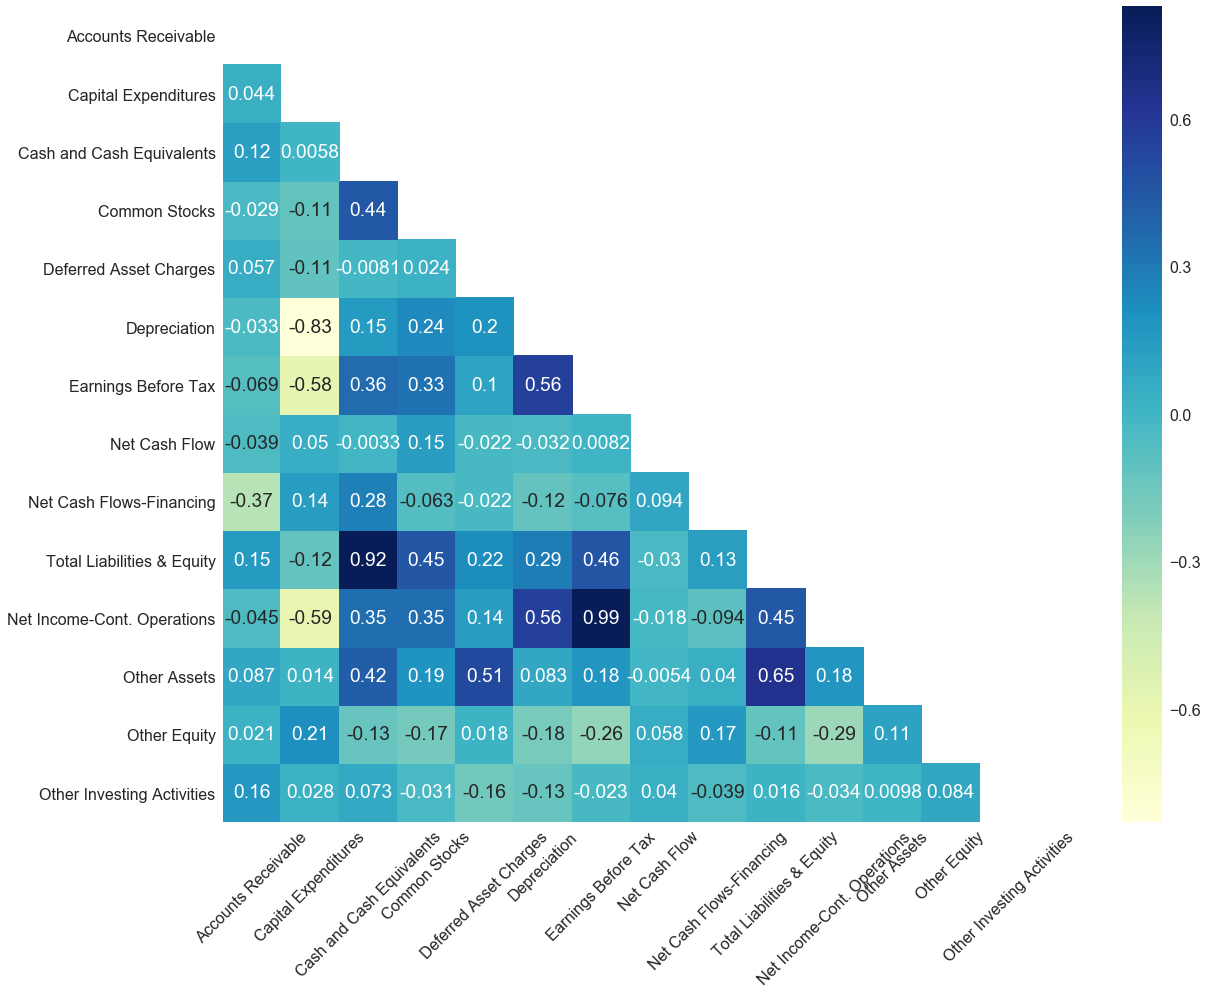

In [36]:
sns.set(font_scale=1.6)      # Set font size
plt.figure(figsize=(30,15)); # Set figure/plot size

# Select columns to plot here
hm = df[[
    'Accounts Receivable', 'Capital Expenditures', 'Cash and Cash Equivalents', 
    'Common Stocks', 'Deferred Asset Charges', 'Depreciation', 'Earnings Before Tax', 
    'Net Cash Flow', 'Net Cash Flows-Financing', 'Total Liabilities & Equity', 
    'Net Income-Cont. Operations', 'Other Assets', 'Other Equity', 'Other Investing Activities'
    ]]

mask = np.zeros_like(hm.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(hm.corr(), mask=mask, vmax=.3, square=True, cmap='YlGnBu', annot=True);
    plt.xticks(rotation=45);
    plt.show();